# Feature on Feature - Correlations

Within this file we will be looking at the features and seeing if there is any kind of correlation between themselves. This will help to eliminate features before looking at their correlation with production. This is because if two features are related to each other and they both end up being related to production, then we will be able to eliminate one of those features as the other feature can predict that eliminated feature.

In [1]:
import numpy as np
import pandas as pd
import math

from pandas import read_excel
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
# First we need to limit our data to the feature data. 
# This means that we need to remove the monthly production data
# for oil and gas production and we need to remove the total 
# production numbers for both gas and oil

main_features = read_excel("main_file_final.xlsx")
main_features = main_features.set_index("Field name")

for i in range(1,584):
    month_oil = "Oil - Month " + str(i)
    month_gas = "Gas - Month " + str(i)
    main_features = main_features.drop([month_oil, month_gas], axis = 1)
    
main_features = main_features.drop(["Orig. recoverable oil \n[mill Sm3]", "Orig. recoverable gas \n[bill Sm3]", "NPDID field"], axis = 1)

In [3]:
main_features

,Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],...,Completion logs,# of Wells,Exp start year,Exp start month,Dev start year,Dev start month,Dev end year,Dev end month,Exp Duration,Dev Duration
Field name,,,,,,,,,,,,,,,,,,,,,
ALBUSKJELL,0,64,0.00,56,0.99,0.00,24.761,0.00,0.00,0.00,...,0,26,1972,7,1978,6,1986,6,71,96
ALVE,3,1,13.50,3,1.41,0.00,14.149,0.34,2.10,0.28,...,0,8,1990,5,2009,1,2016,7,224,90
ALVHEIM,0,10,11.69,109,0.00,0.00,61.850,9.31,4.20,0.00,...,0,15,1974,10,2006,5,2019,9,379,160
ATLA,0,0,1.88,0,0.00,0.00,1.800,0.00,0.00,0.00,...,0,5,2010,8,2012,6,2012,6,22,0
BALDER,0,14,0.00,263,0.00,0.00,110.120,36.18,1.24,0.00,...,0,7,1970,4,1996,5,2016,4,313,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YTTERGRYTA,1,0,7.39,0,0.41,0.00,3.289,0.00,0.00,0.00,...,0,2,2007,5,2008,10,2008,10,17,0
Ã†RFUGL,0,0,63.00,13,4.15,0.00,50.825,4.65,31.61,3.52,...,0,4,2000,5,2010,9,2020,3,124,114
Ã˜ST FRIGG,0,0,21.37,0,0.00,0.07,9.290,0.00,0.00,0.00,...,0,5,1973,8,1987,7,1988,3,167,8


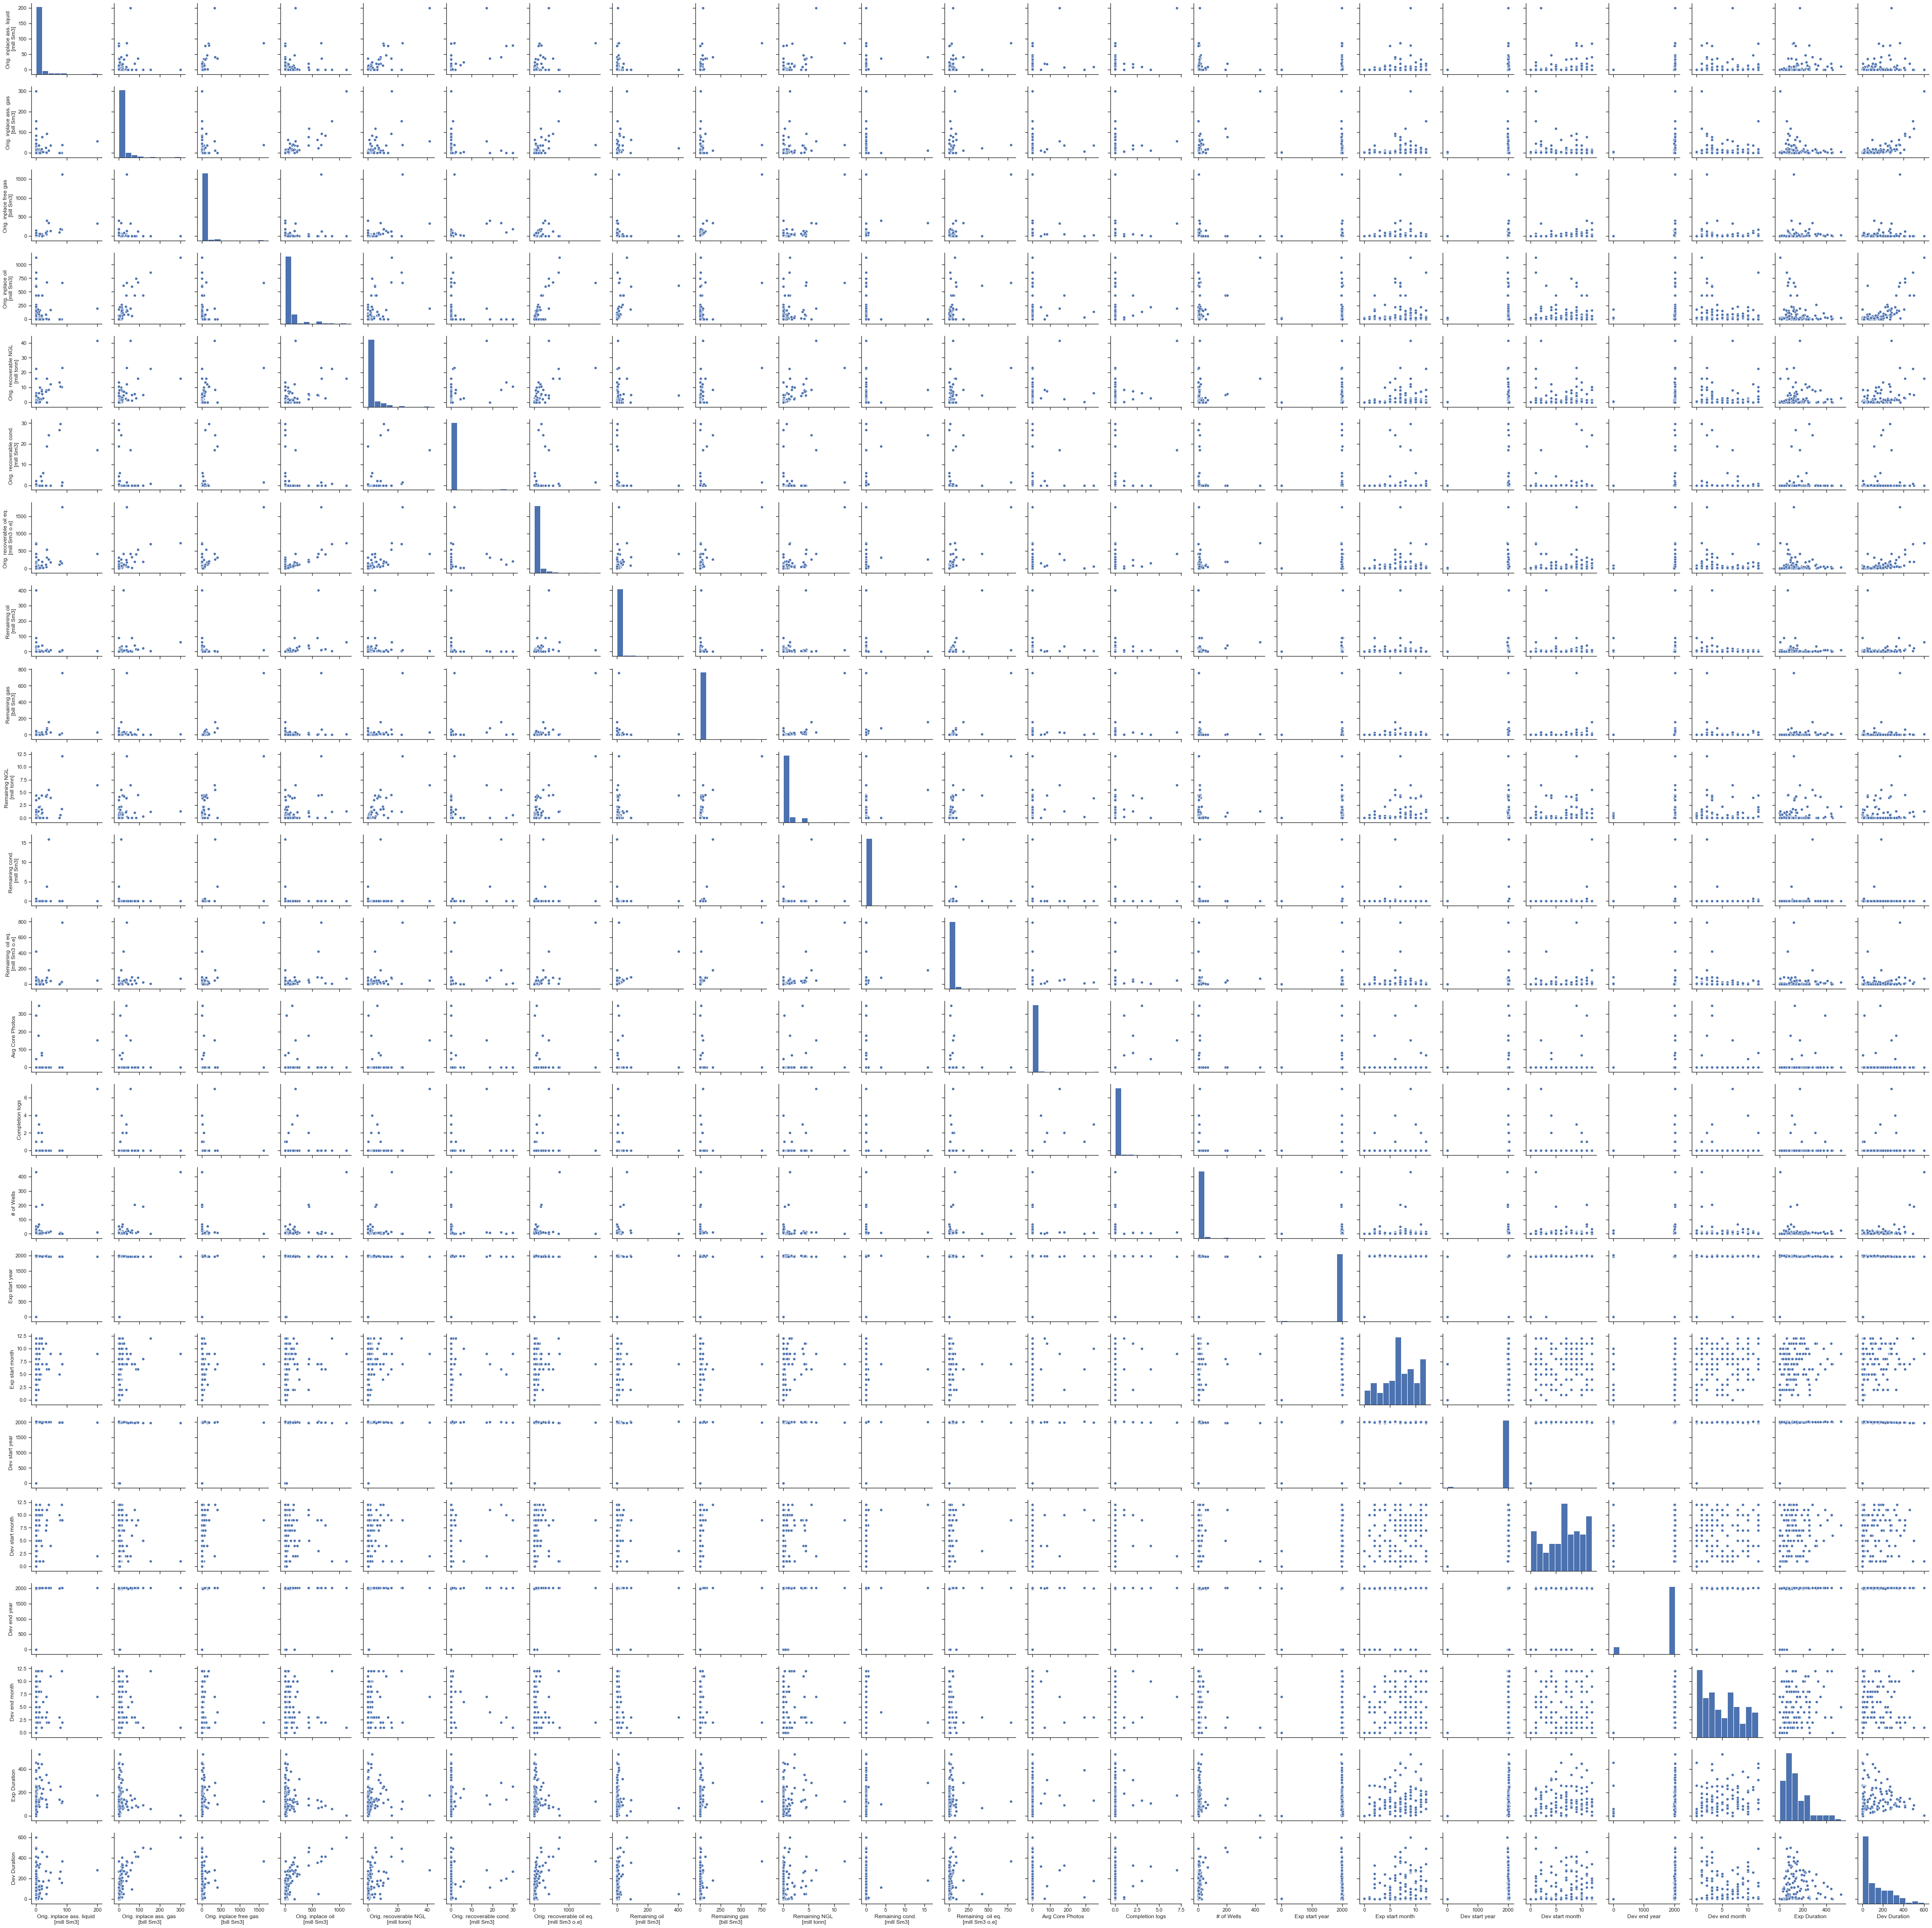

In [4]:
# Next we print up a complete pairplot of all the features to see if we see any 
# interesting relationships within the features.

g = sns.pairplot(main_features)

In [5]:
# Here we want to save off the feature data as it will help us not have 
# to remove the production data constantly.
main_features.to_csv("features_with_data.csv")

In [6]:
temp_features = main_features.drop([main_features.columns[0],
                                    main_features.columns[1],
                                    main_features.columns[2],
                                    main_features.columns[3],
                                    main_features.columns[4],
                                    main_features.columns[5],
                                    main_features.columns[6],
                                    main_features.columns[7],
                                    main_features.columns[8],
                                    main_features.columns[9],
                                    main_features.columns[10],
                                    main_features.columns[11],
                                    main_features.columns[12],
                                    main_features.columns[13],
                                    main_features.columns[14],], axis = 1)

This next section is to help show a specific instance in the pairplot (experimental duration and developmental duration) and show how there is a "no-fly-zone" under the line y = 600 - x.

In [7]:
temp_features

,Exp start year,Exp start month,Dev start year,Dev start month,Dev end year,Dev end month,Exp Duration,Dev Duration
Field name,,,,,,,,
ALBUSKJELL,1972,7,1978,6,1986,6,71,96
ALVE,1990,5,2009,1,2016,7,224,90
ALVHEIM,1974,10,2006,5,2019,9,379,160
ATLA,2010,8,2012,6,2012,6,22,0
BALDER,1970,4,1996,5,2016,4,313,239
...,...,...,...,...,...,...,...,...
YTTERGRYTA,2007,5,2008,10,2008,10,17,0
Ã†RFUGL,2000,5,2010,9,2020,3,124,114
Ã˜ST FRIGG,1973,8,1987,7,1988,3,167,8


In [8]:
temp_features = temp_features.drop([temp_features.columns[0],
                                    temp_features.columns[1],
                                    temp_features.columns[2],
                                    temp_features.columns[3],
                                    temp_features.columns[4],
                                    temp_features.columns[5]], axis = 1)

In [9]:
temp_features

,Exp Duration,Dev Duration
Field name,,
ALBUSKJELL,71,96
ALVE,224,90
ALVHEIM,379,160
ATLA,22,0
BALDER,313,239
...,...,...
YTTERGRYTA,17,0
Ã†RFUGL,124,114
Ã˜ST FRIGG,167,8


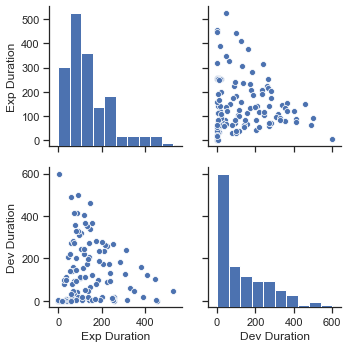

In [10]:
g = sns.pairplot(temp_features)

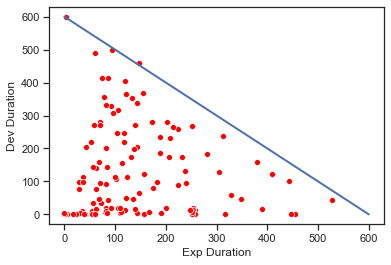

In [11]:
import matplotlib.pyplot as plt

g = sns.scatterplot(x="Exp Duration", 
                    y = "Dev Duration", 
                    color = 'red',
                    data = temp_features)
plt.plot([0,600],[600,0], linewidth = 2)